# Sentiment Analysis Recommendation System STC EDA

## Group: U_Data

    Members:
    
    Aroob Almutairi 
    
    Abdulrahman Alosaimi
    
    Duaa Al saad 
    
    Fatimah Alateeq
    
    Ghaliah mohammedhussein

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

%matplotlib inline 

In [2]:
dff = pd.read_csv("Cleaned_data_set/clean_stc_data_set.csv") 

In [3]:
dff

,Unnamed: 0,date_,month,year,user_id_maped,program_name,duration_seconds,duration_in_min,duration_in_hour,program_class,season,episode,program_genre,hd,original_name,commercial_account,family_account,score,normalized_score
0,0,2017-05-27,5,2017,26138,100 treets,40,0,0,MOVIE,0,0,Drama,0,100 treets,No,Yes,0,1
1,1,2017-05-21,5,2017,7946,Moana,17,0,0,MOVIE,0,0,Animation,1,Moana,No,Yes,13,8
2,2,2017-08-10,8,2017,7418,The Mermaid Princess,8,0,0,MOVIE,0,0,Animation,1,The Mermaid Princess,No,Yes,0,1
3,3,2017-07-26,7,2017,19307,The Mermaid Princess,76,1,0,MOVIE,0,0,Animation,1,The Mermaid Princess,No,Yes,0,1
4,4,2017-07-07,7,2017,15860,Churchill,87,1,0,MOVIE,0,0,Biography,1,Churchill,No,Yes,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3597764,3598602,2017-08-22,8,2017,10486,Table,8,0,0,MOVIE,0,0,Comedy,1,Table,No,Yes,0,1
3597765,3598603,2017-08-22,8,2017,10486,Newsies: the Broadway Musical,3,0,0,MOVIE,0,0,Family,1,Newsies: the Broadway Musical,No,Yes,1,1
3597766,3598604,2018-01-31,1,2018,3674,Dragon Ball Z: Resurrection F,7,0,0,MOVIE,0,0,Animation,0,Dragon Ball Z: Resurrection F,No,Yes,1,1
3597767,3598605,2017-09-19,9,2017,717,Table,97,1,0,MOVIE,0,0,Comedy,1,Table,No,Yes,0,1


In [4]:
dff['date_']= pd.to_datetime(dff['date_']) 

In [5]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3597769 entries, 0 to 3597768
Data columns (total 19 columns):
 #   Column              Dtype         
---  ------              -----         
 0   Unnamed: 0          int64         
 1   date_               datetime64[ns]
 2   month               int64         
 3   year                int64         
 4   user_id_maped       int64         
 5   program_name        object        
 6   duration_seconds    int64         
 7   duration_in_min     int64         
 8   duration_in_hour    int64         
 9   program_class       object        
 10  season              int64         
 11  episode             int64         
 12  program_genre       object        
 13  hd                  int64         
 14  original_name       object        
 15  commercial_account  object        
 16  family_account      object        
 17  score               int64         
 18  normalized_score    int64         
dtypes: datetime64[ns](1), int64(12), object(6)

In [6]:
dff['program_class'].unique()

array(['MOVIE', 'SERIES/EPISODES'], dtype=object)

# EDA

In [7]:
dff['user_id_maped'].value_counts().sum()

3597769

In [8]:
#Count of user_id for each unique movie as recommendation score 
grouped = dff.groupby(['month','year']).agg({'user_id_maped': 'count'}).reset_index()
grouped.rename(columns = {'user_id_maped': 'total'},inplace=True)
grouped.sort_values(by=['total'],ascending=False)

,month,year,total
4,4,2017,319205
3,3,2018,307454
12,11,2017,299767
0,1,2018,289891
6,5,2017,289260
13,12,2017,288473
5,4,2018,268375
1,2,2018,266161
8,7,2017,244951
9,8,2017,221488


### As we can see, there’s a significant increase in the number of users in March 2018 than it was in march 2017. Although, it has slightly decreased in April 2018 than it was in April 2017.

Text(0, 0.5, 'Amount')

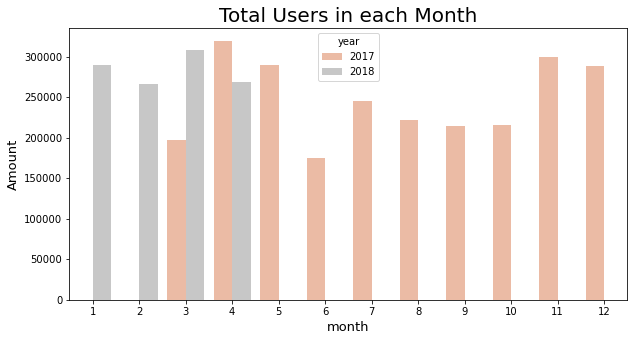

In [9]:
plt.figure(figsize=(10,5))
plt.title("Total Users in each Month", fontsize= 20)
graph=sns.barplot(x=grouped.month , y=grouped['total'],hue=grouped['year'] ,palette="RdGy")

plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)    # fontsize of the tick labels
plt.rc('legend', fontsize=12)    # legend fontsize

plt.xlabel("month", fontsize= 13)
plt.ylabel("Amount", fontsize= 13)

### here we see that count movies/series have been shown by commercial accounts, that around less than 500,000 show. and the commercial accounts are that open grater than 24 hour a day. while we see that the uncommercial accounts are not the most here.

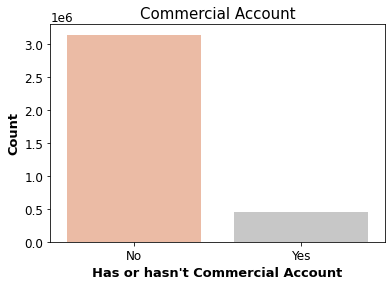

In [10]:
plt.figure(figsize=(6,4))
sns.countplot(x='commercial_account',data=dff, palette='RdGy')
plt.title('Commercial Account', fontsize= 15)
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)    # fontsize of the tick labels
plt.rc('legend', fontsize=12)    # legend fontsize
plt.xlabel("Has or hasn't Commercial Account", fontsize= 13,fontweight="bold")
plt.ylabel('Count', fontsize= 13,fontweight="bold")
plt.show()

### here we see that count movies/series have been shown by family accounts, that more than 3mil show. and the family accounts are that open equal or less than 16 hours a day. while we see that the family accounts are the most here.

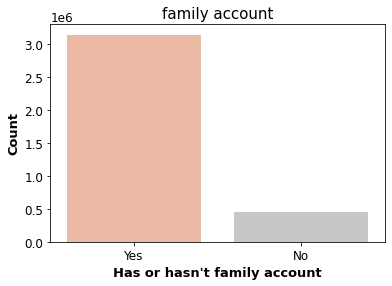

In [11]:
plt.figure(figsize=(6,4))
sns.countplot(x='family_account',data=dff, palette='RdGy')
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)    # fontsize of the tick labels
plt.rc('legend', fontsize=12)    # legend fontsize
plt.title('family account', fontsize= 15)
plt.xlabel("Has or hasn't family account", fontsize= 13,fontweight="bold")
plt.ylabel('Count', fontsize= 13,fontweight="bold")
plt.show()

### As we can see, Drama and animation genre upstaged all other genre in both movie and series.

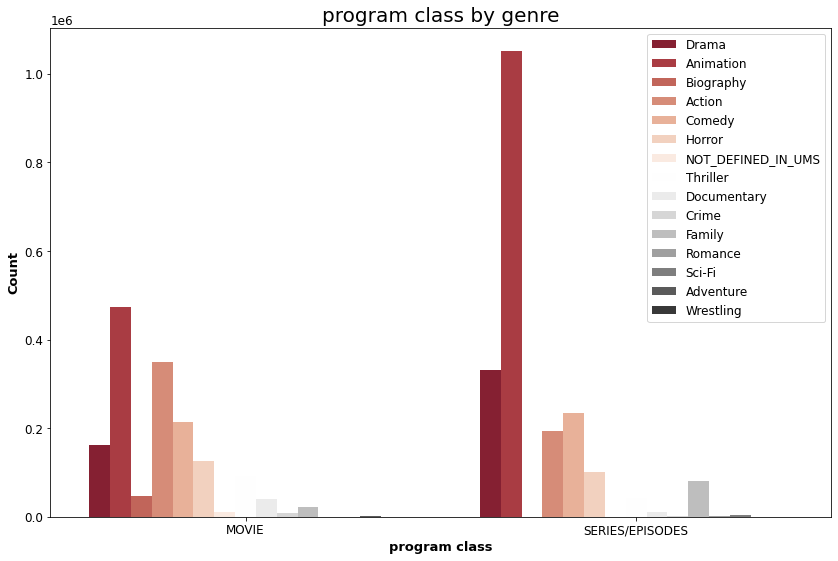

In [12]:
plt.figure(figsize=(14,9))
sns.countplot(x='program_class',data=dff, hue='program_genre', palette='RdGy')
plt.title('program class by genre', fontsize= 20)
plt.legend(loc='upper right')
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)    # fontsize of the tick labels
plt.rc('legend', fontsize=12)    # legend fontsize
plt.xlabel('program class', fontsize= 13,fontweight="bold")
plt.ylabel('Count', fontsize= 13,fontweight="bold")
plt.show()

### Here is the count users by date. First of all, there are 3 minimum bottoms, actually these 3 minimum bottoms are related with an important islamic days in hijri calendar. First one at 2017-05-28 which is first Ramadan, second one at 2017-06-25 which is Eid al-Fitr, and third was at 2017-08-31 which is Eid al-Adha. Also, the strong decrease of users starts before each these days with in about 2-3 days and then start increase after those important islamic days. Secondly, we notice that in Ramadan the count users becomes less than other days becouse change in poeple's behaveor since famelies or friends gather and watch TV from one account.

Text(0, 0.5, 'Count Shows')

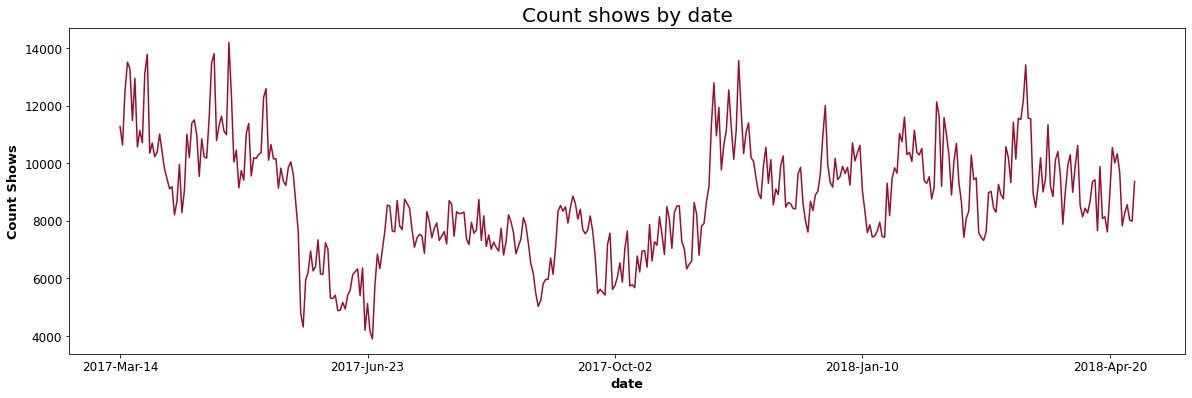

In [13]:
# general plot
ss=dff.sort_values(by='date_')
plt.figure(figsize=(20,6))
ss.groupby(ss['date_'].dt.strftime('%Y-%b-%d'), sort=False)['user_id_maped'].size().plot(color="#9a0e2e")
plt.title('Count shows by date', fontsize= 20)
plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)    # fontsize of the tick labels
plt.rc('legend', fontsize=12)    # legend fontsize
plt.xlabel('date', fontsize= 13,fontweight="bold")
plt.ylabel('Count Shows', fontsize= 13,fontweight="bold")
#here count shows by days

### first bottom:
here we see Stability in the number of users (between 14k and 8k)and then it dropped down at first Ramadan to less than 4.5k.

### second bottom:
here after first Ramadan it rised fast, but didn't back to the range before Ramadan.And we notice that Ramadan is the lowest month of users number in this data, the users count was between around 4.5 and 7.5k , actually it could because families and friends are gather in Ramadan and use one account. and then the users count dropped to the most minimum at Eid al-Fitr which is less than 4k accounts.

### third bottom:
after Eid al-Fitr the users counts rised fast and comes to approche more than 8k users in a stable range between 8.8k and 6.8k. and then it  dropped at Eid al-Adha to around 5k users.

### increase:
after Eid al-Adha the count of useres gets increase with no strong downs. but it didn't back to achieve 14k users.

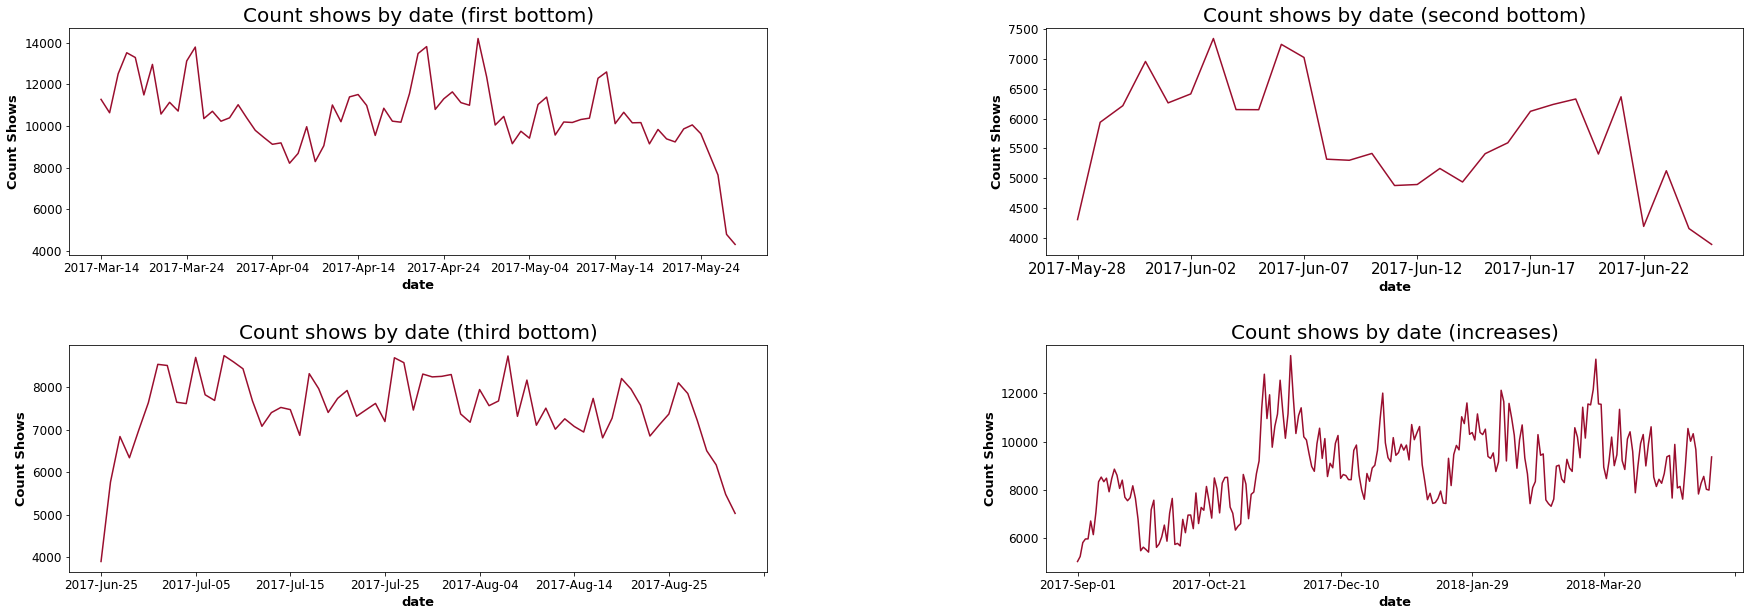

In [14]:
sub_date_go_down1=dff.loc[dff['date_']<='2017-05-28']
sub_date_go_down1=sub_date_go_down1.sort_values(by='date_')

sub_date_go_down2=dff.loc[dff['date_']<='2017-06-25']
sub_date_go_down2=sub_date_go_down2.loc[dff['date_']>='2017-05-28']
sub_date_go_down2=sub_date_go_down2.sort_values(by='date_')

sub_date_Go_Down3=dff.loc[dff['date_']>='2017-09-1']
sub_date_Go_Down3=sub_date_Go_Down3.sort_values(by='date_')

sub_date_go_down4=dff.loc[dff['date_']<='2017-09-1']
sub_date_go_down4=sub_date_go_down4.loc[dff['date_']>='2017-06-25']
sub_date_go_down4=sub_date_go_down4.sort_values(by='date_')

fig = plt.figure(figsize=(30,10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax = fig.add_subplot(2, 2, 2)
sub_date_go_down2.groupby(sub_date_go_down2['date_'].dt.strftime('%Y-%b-%d'), sort=False)['user_id_maped'].size().plot(color="#9a0e2e")
plt.title('Count shows by date (second bottom)', fontsize= 20)
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)    # fontsize of the tick labels
plt.rc('legend', fontsize=12)    # legend fontsize
plt.xlabel('date', fontsize= 13,fontweight="bold")
plt.ylabel('Count Shows', fontsize= 13,fontweight="bold")

ax = fig.add_subplot(2, 2, 1)
sub_date_go_down1.groupby(sub_date_go_down1['date_'].dt.strftime('%Y-%b-%d'), sort=False)['user_id_maped'].size().plot(color="#9a0e2e")
plt.title('Count shows by date (first bottom)', fontsize= 20)
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)    # fontsize of the tick labels
plt.rc('legend', fontsize=12)    # legend fontsize
plt.xlabel('date', fontsize= 13,fontweight="bold")
plt.ylabel('Count Shows', fontsize= 13,fontweight="bold")

ax = fig.add_subplot(2, 2, 3)
sub_date_go_down4.groupby(sub_date_go_down4['date_'].dt.strftime('%Y-%b-%d'), sort=False)['user_id_maped'].size().plot(color="#9a0e2e")
plt.title('Count shows by date (third bottom)', fontsize= 20)
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)    # fontsize of the tick labels
plt.rc('legend', fontsize=12)    # legend fontsize
plt.xlabel('date', fontsize= 13,fontweight="bold")
plt.ylabel('Count Shows', fontsize= 13,fontweight="bold");

ax = fig.add_subplot(2, 2, 4)
sub_date_Go_Down3.groupby(sub_date_Go_Down3['date_'].dt.strftime('%Y-%b-%d'), sort=False)['user_id_maped'].size().plot(color="#9a0e2e")
plt.title('Count shows by date (increases)', fontsize= 20)
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)    # fontsize of the tick labels
plt.rc('legend', fontsize=12)    # legend fontsize
plt.xlabel('date', fontsize= 13,fontweight="bold")
plt.ylabel('Count Shows', fontsize= 13,fontweight="bold");

plt.show();

### This bar chart shows that the majority of contents are HD resolutions as expected.

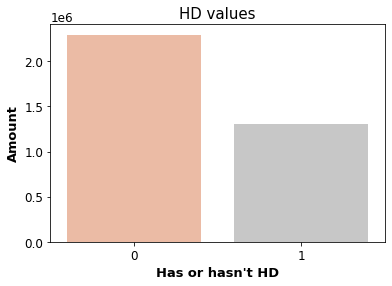

In [15]:
plt.figure(figsize=(6,4))
sns.countplot(x='hd',data=dff, palette='RdGy')
plt.title("HD values", fontsize= 15)
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)    # fontsize of the tick labels
plt.rc('legend', fontsize=12)    # legend fontsize
plt.ylabel("Amount", fontsize= 13,fontweight="bold")
plt.xlabel("Has or hasn't HD", fontsize= 13,fontweight="bold")
plt.show()

### This line graph shows the trend in watching genre habits between 2017–2018. As this chart illustrate, unspecified genre series, romance and actions were the most shows watched at that time, Biography and documentary were the least favorited to watch.

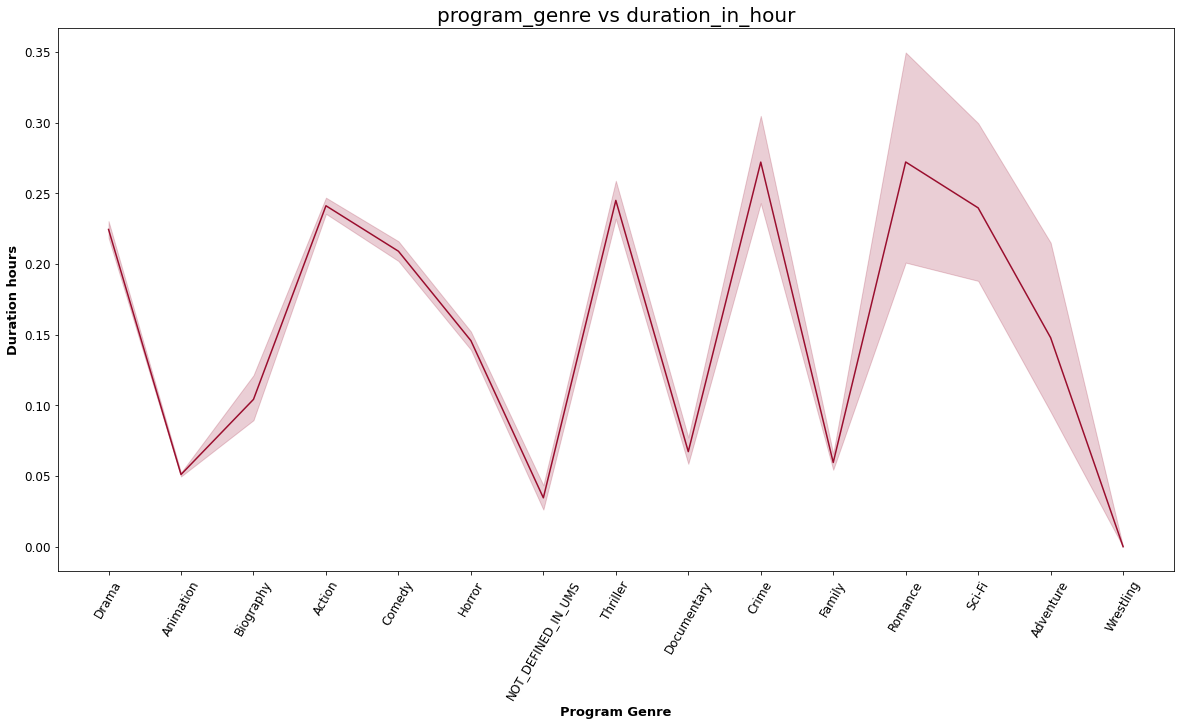

In [16]:
plt.figure(figsize=(20,10))
plt.title("program_genre vs duration_in_hour", fontsize= 20)
sns.lineplot( x=dff["program_genre"], y=dff['duration_in_hour'], color="#9a0e2e" )
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)    # foSntsize of the tick labels
plt.rc('legend', fontsize=12)    # legend fontsize
plt.ylabel("Duration hours",fontsize= 13,fontweight="bold")
plt.xlabel("Program Genre", fontsize= 13,fontweight="bold")
plt.tick_params(axis='x', rotation=60)

### This chart shows that animation, Family genre has the most avrage episodes count respectively.

In [17]:
p=dff.loc[(dff['program_class']=='SERIES/EPISODES')&(dff['episode']>=10)]
b=pd.DataFrame(p.groupby('program_genre')['episode'].mean())
b=b.reset_index()
b

,program_genre,episode
0,Action,14.945772
1,Animation,24.320491
2,Comedy,17.044483
3,Crime,15.087629
4,Documentary,10.354633
5,Drama,19.191841
6,Family,18.936558
7,Horror,12.641607
8,Romance,10.786802
9,Sci-Fi,10.000000


Text(0, 0.5, 'Genre')

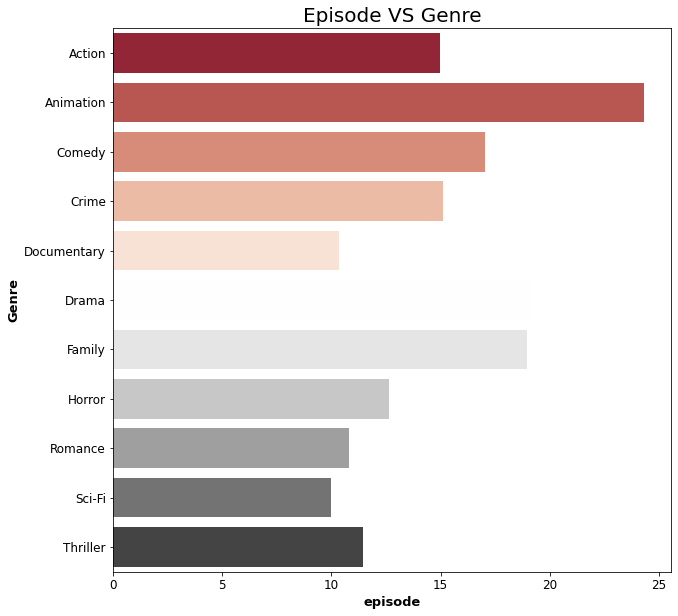

In [18]:
# Bar Chart

plt.figure(figsize=(10,10))
plt.title("Episode VS Genre", fontsize= 20)
sns.barplot(y=b['program_genre'] ,x=b['episode'], palette='RdGy')
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)    # fontsize of the tick labels
plt.rc('legend', fontsize=12)    # legend fontsize
plt.xlabel("episode", fontsize= 13,fontweight="bold")
plt.ylabel("Genre", fontsize= 13,fontweight="bold")

### This pie chart illustrate Top 10 programs watched during 2017–2018. 100 streets, Moana and The mermaid princess were the most popular programs at that time.


Text(0.5, 1.0, 'Top 10 program')

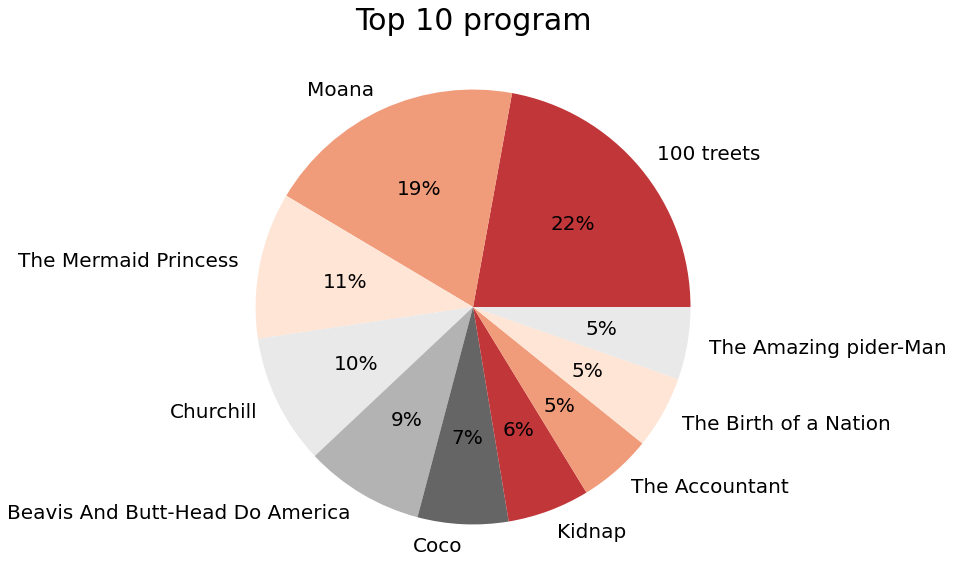

In [19]:
plt.figure(figsize=(10,10))
labels=dff["program_name"].unique()
z=dff["program_name"].value_counts()
colors = sns.color_palette('RdGy')
plt.pie(z.iloc[:10],labels =labels[:10], colors = colors,autopct='%.0f%%',textprops={'fontsize': 20})
plt.title('Top 10 program', fontsize= 30)